# Notebook 2: Curve Fitting

---

Authors: [Christopher Monterola](https://www.chrismonterola.net), Sebastian Ibañez, Benjur Borja

Copyright © 2022 Christopher Monterola, Sebastian Ibañez, Benjur Borja. All rights reserved.

This notebook was written, conceptualized, and prepared for the Mathematics for Data Science course under AIM's MS in Data Science program. None of the content here shall be reproduced and/or distributed without the written permission of the authors. 

The authors would like to acknowledge the AIM MSDS program team members for their help and support in building the notebooks. 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Executive Summary

---

The next set of notebook cells demonstrates how to fit nonlinear curves.

The standard method used for curve fitting is called the [method of least squares](https://www.sciencedirect.com/topics/engineering/method-of-least-square) which seeks to find the parameters of our function $f(x)$ that minimizes the sum of squared residuals (SSR):

\begin{equation}
\sum_{i=1}^{n} (y_i - f(x_i))^2
\end{equation}

where $n$ in fitting terminology is the number of data points. A lower SSR implies a better fit.

The default fitting algorithm used by the code below is known as the [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm), a relatively robust fitting method that combines the [Gauss–Newton algorithm](https://en.wikipedia.org/wiki/Gauss–Newton_algorithm) with [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). Robust means that, in many cases, it can find a solution even if it starts very far from the final minimum.

For illustration, we start by defining the important libraries and load our data.

In [49]:
import pandas as pd
import numpy as np

In [50]:
# use pandas to load the csv file
df_boston = pd.read_csv('data/Boston.csv')
# change the location depending on where you save the .csv file!
 ## Boston house prices dataset

# preview the dataset
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
# get our x & y variables
input = df_boston['lstat'].to_numpy()
observed = df_boston['medv'].to_numpy()
 ## % lower status of the population (adults with no high school education and proportion of male workers classified as laborers)
 ## Median value of owner-occupied homes in $1000’s

# convert x & y into numpy arrays for "easier/simpler" manipulation
# I already did this by using the fact that you can chain methods.





Let's plot the data to see what it looks like.

Text(0, 0.5, 'Median Value in $1000')

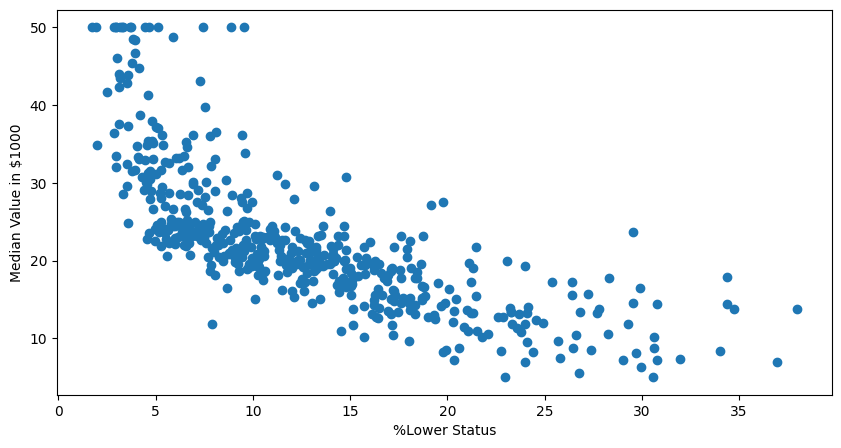

In [52]:
import matplotlib.pyplot as plt

# adjust size of ALL SUCCEEDING plots
plt.rcParams['figure.figsize'] = [10, 5] ## change numbers to make the plots taller/wider

# plot the graph
plt.scatter(input, observed)
plt.xlabel('%Lower Status')
plt.ylabel('Median Value in $1000')

## Linear Fitting

---

In [53]:
from scipy.optimize import curve_fit

m   = -0.950049
b   = 34.553841
SSR = 19472.381418


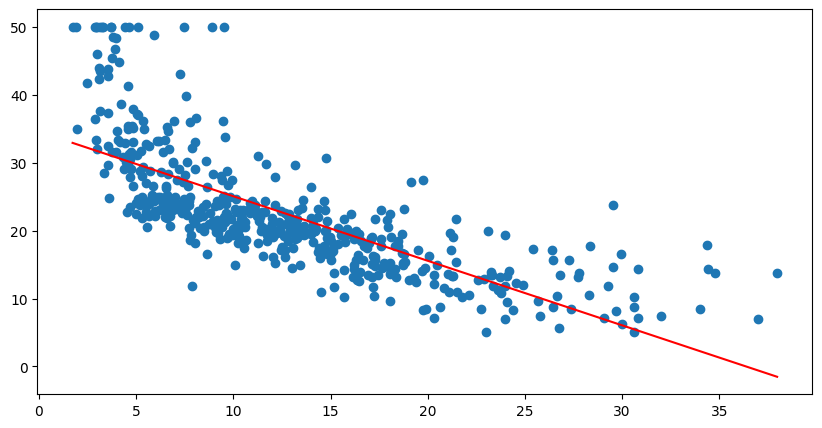

In [54]:
# define the function we want to fit
def linear(x, m, b):
    return m * x + b

# fit function to data
# the curve_fit() function returns 2 objects (READ THIS: TWO, DOS, DALAWA)
# popt - optimal values for the parameters
# pcov - estimated covariance of popt (not important right now)
popt, pcov = curve_fit(linear, input, observed)

# calculate sum of squared residuals (SSR)
predicted = linear(input, popt[0], popt[1])
error = observed - predicted
ssr = sum(error ** 2)

# print the calculated optimal values and the SSR up to 6 decimals
print(f"m   = {popt[0]:.6f}\nb   = {round(popt[1], 6)}\nSSR = {ssr:.6f}")

x_range = np.linspace(min(input), max(input), 100)

plt.plot(x_range, linear(x_range, popt[0], popt[1]), 'r')
plt.scatter(input, observed)

## Quadratic Fitting

---

a   = 0.043547
b   = -2.332821
c   = 42.862007
SSR = 15347.243158


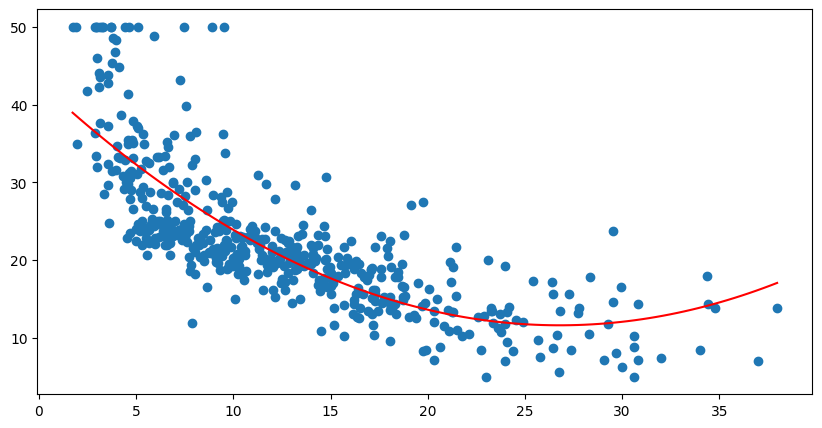

In [55]:
def quadratic(x, a, b, c):
    return a * x ** 2 + b * x + c

popt, pcov = curve_fit(quadratic, input, observed)

predicted = quadratic(input, popt[0], popt[1], popt[2])
error = observed - predicted
ssr = sum(error ** 2)
print(f"a   = {popt[0]:.6f}\nb   = {popt[1]:.6f}\nc   = {popt[2]:.6f}\nSSR = {ssr:.6f}")

x_range = np.linspace(min(input), max(input), 100)

plt.plot(x_range, quadratic(x_range, popt[0], popt[1], popt[2]), 'r')
plt.scatter(input, observed)

## Cubic fitting

---

popt[0] = -0.002004
popt[1] = 0.148738
popt[2] = -3.865593
popt[3] = 48.649625
SSR = 14615.481262
[[ 1.59763544e-07 -8.38667193e-06  1.22204194e-04 -4.61432841e-04]
 [-8.38667193e-06  4.53636266e-04 -6.84001076e-03  2.67760684e-02]
 [ 1.22204194e-04 -6.84001076e-03  1.08100323e-01 -4.48340445e-01]
 [-4.61432841e-04  2.67760684e-02 -4.48340445e-01  2.05843279e+00]]


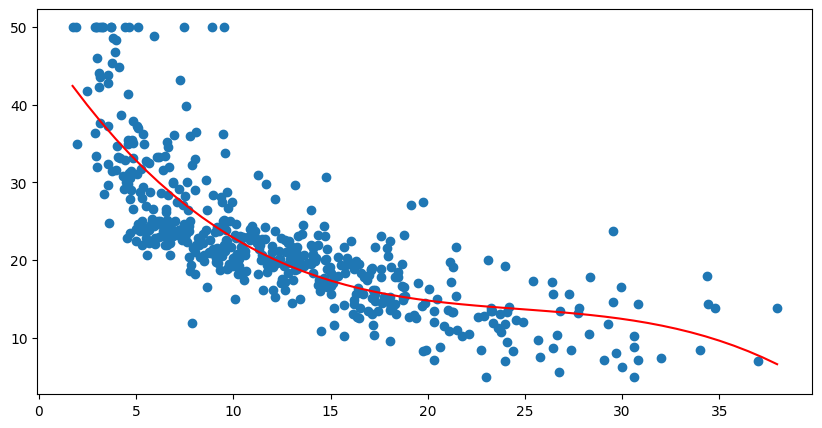

In [56]:
def cubic(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

popt, pcov = curve_fit(cubic, input, observed)

predicted = cubic(input, popt[0], popt[1], popt[2], popt[3])
errors = observed - predicted
ssr = sum(errors ** 2)

for i in range(len(popt)):
    print(f'popt[{i}] = {popt[i]:.6f}')

print(f'SSR = {ssr:.6f}')
x_range = np.linspace(min(input), max(input))
predicted = cubic(x_range, popt[0], popt[1], popt[2], popt[3])

plt.plot(x_range, predicted, 'r')
plt.scatter(input, observed)

print(pcov)

## Sine Fitting

---

popt[0] = -1.0131543808360601
popt[1] = 0.9542508201403709
popt[2] = 5.446824817361845
popt[3] = 22.5603596332521
SSR = 42446.9220262467


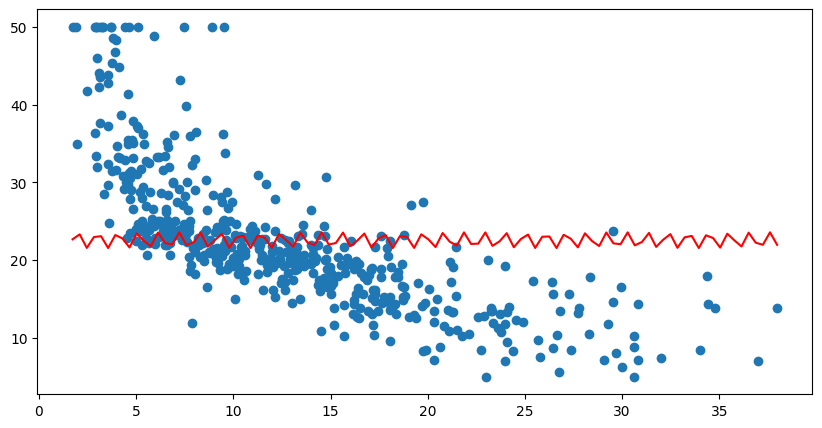

In [57]:
def sine(x, amplitude, frequency, phase, bias):
    return np.sin(2 * np.pi * frequency * x + phase) * amplitude + bias

popt, pcov = curve_fit(sine, input, observed)

for i in range(len(popt)):
    print(f'popt{[i]} = {popt[i]}')

predicted = sine(input, popt[0], popt[1], popt[2], popt[3])
errors = observed - predicted
ssr = sum(errors ** 2)

print(f'SSR = {ssr}')

x_range = np.linspace(min(input), max(input), 100)
predicted = sine(x_range, popt[0], popt[1], popt[2], popt[3])

plt.plot(x_range, predicted, 'r')
plt.scatter(input, observed)


## Exponential Fitting

---

popt[0] = 41.495853
popt[1] = -0.141286
popt[2] = 12.378917
SSR = -0.000014


/var/folders/80/nt46s_zj37q09s9bvd_1j0vw0000gn/T/ipykernel_3727/1933656343.py:2: RuntimeWarning: overflow encountered in exp
  return A * np.exp(b * x) + c
/var/folders/80/nt46s_zj37q09s9bvd_1j0vw0000gn/T/ipykernel_3727/1933656343.py:2: RuntimeWarning: overflow encountered in multiply
  return A * np.exp(b * x) + c


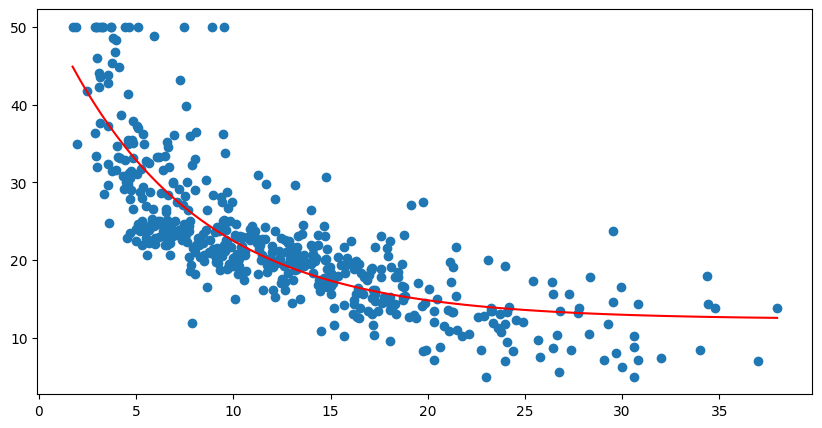

In [58]:
def exp(x, A, b, c):
    return A * np.exp(b * x) + c

# p0 tells you the intiial parameters.
popt, pcov = curve_fit(exp, input, observed, p0=[1, -1, 0])

for i in range(len(popt)):
    print(f'popt{[i]} = {popt[i]:.6f}')

predicted = exp(input, popt[0], popt[1], popt[2])
errors = observed - predicted
ssr = sum(errors * 2)
print(f'SSR = {ssr:.6f}')

x_range = np.linspace(min(input), max(input), 100)
predicted = exp(x_range, popt[0], popt[1], popt[2])

plt.plot(x_range, predicted, 'r')
plt.scatter(input, observed)

## Power Law Fitting

---

13948.021654743428


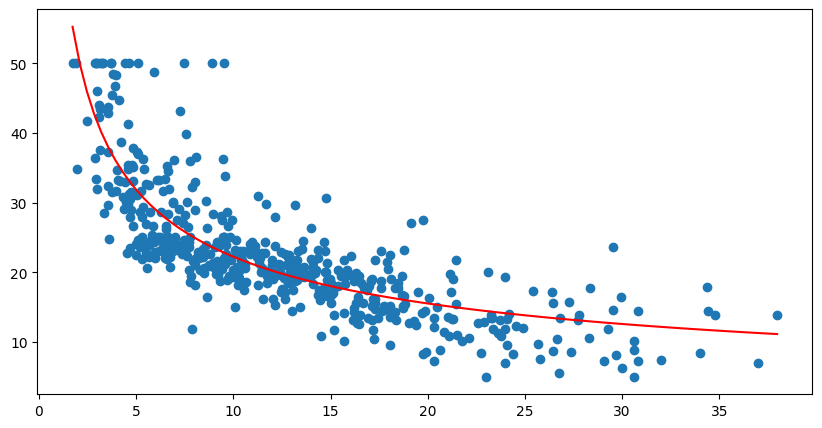

In [74]:
def power(x, A, alpha):
    return A * x ** (alpha)

popt, pcov = curve_fit(power, input, observed)

predicted = power(input, *popt)
errors = observed - predicted
ssr = sum(errors ** 2)
print(ssr)

x_range = np.linspace(min(input), max(input), 100)
predicted = power(x_range, popt[0], popt[1])

plt.plot(x_range, predicted, 'r')
plt.scatter(input, observed)


## Combo Fitting

---

ValueError: x and y must have same first dimension, but have shapes (100,) and (506,)

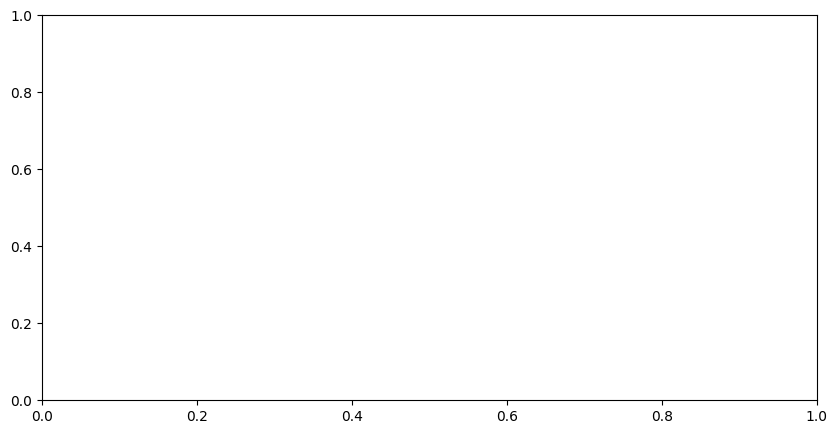

In [73]:
def combo1(x, A, alpha, A2, f, C, D):
    return A * x **(-alpha) + A2 *  np.sin(2 * np.pi * f * x + C) +D

popt, pcov = curve_fit(combo1, input, observed)

len(popt)

# ssr = sum((observed - combo1(x, *popt)) ** 2)

x_range = np.linspace(min(input), max(input), 100)
predictions = combo1(input, *popt)

plt.plot(x_range, predictions)
plt.scatter(input, observed)

## Gaussian Fitting

---

There are certain things to keep in mind when fitting a Gaussian function to data:

1) The variable $x$ should be univariate

2) The Gaussian function should be fit on the histogram of $x$

See the following example:

,x,y
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


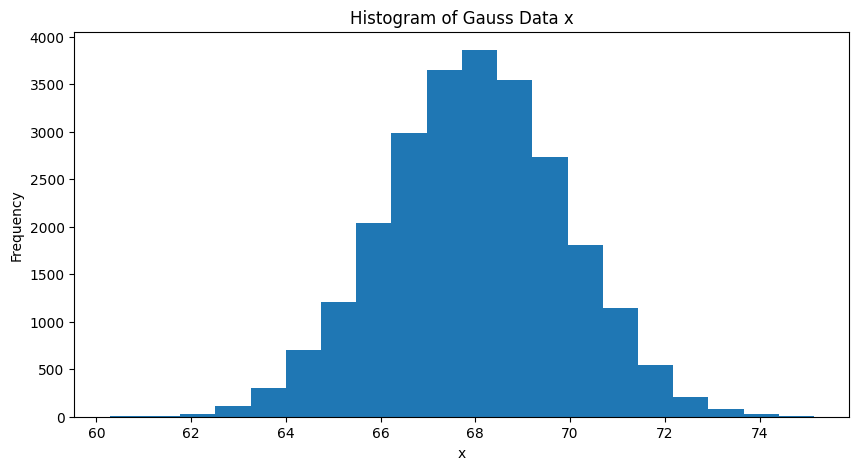

In [13]:
df_gauss = pd.read_csv('data/Gauss.csv')

display(df_gauss)

x = df_gauss['x']
y = df_gauss['y']

x = x.to_numpy()
y = y.to_numpy()

# We will only focus on the x variable!
plt.hist(x, bins = 20) ## Plot a histogram with 20 bins
plt.title("Histogram of Gauss Data x")
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

 mean = 67.993114
stdev = 1.901641
  SSR = 499.950541


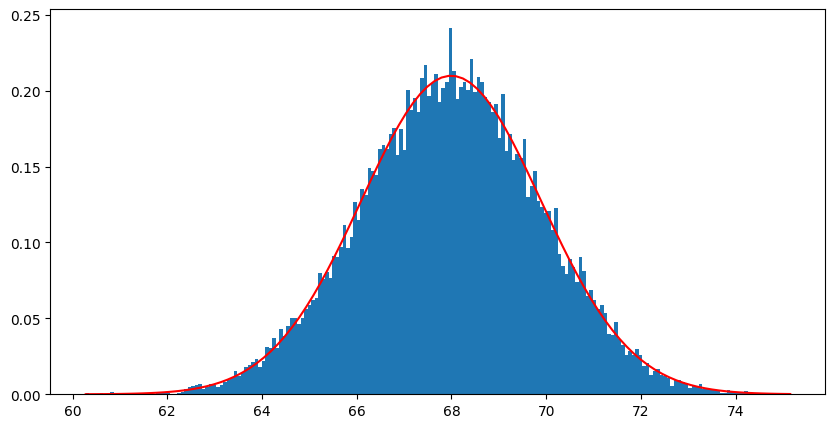

In [ ]:
def gaussian(x, mean, stdev):
    return (1/np.sqrt(2 * np.pi * stdev**2)) * np.exp(-(x - mean)**2 / (2*stdev**2))

# Calculate the mean and standard deviation of our data
mean = np.mean(x)
stdev = np.std(x)

# See https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
ssr = sum((np.histogram(x, bins = len(x), density = True)[0] - gaussian(x, mean, stdev))**2)

print(f' mean = {mean:.6f}')
print(f'stdev = {stdev:.6f}')
print(f'  SSR = {ssr:.6f}')

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, gaussian(x_range, mean, stdev), 'r-')
plt.hist(x, bins = 200, density = True) ## We set density = True so that the scale of the two plots will match
plt.show()

## Sigmoid Fitting

---

<div class="alert alert-block alert-info">

**Video**: Check out this COOL video by [`3Blue1Brown`](https://www.youtube.com/watch?v=Kas0tIxDvrg) on exponential and sigmoid (logistic curve) fitting to COVID-19 data.

</div>

When fitting a sigmoid function to data, keep in mind that these types of functions are S-shaped and are asymptotic to some y-values. This means that as $x$ goes to infinity (negative infinity), $y$ approaches some upper (lower) bound.

See the following example:

In [15]:
df_pop = pd.read_csv('data/Population.csv') ## Population of England and Wales from 1700 to 2001

df_pop

,year,population
0,1700,5.835
1,1710,6.013
2,1720,6.048
3,1730,6.008
4,1740,6.013
5,1750,6.253
6,1760,6.665
7,1770,7.124
8,1780,7.581
9,1790,8.216


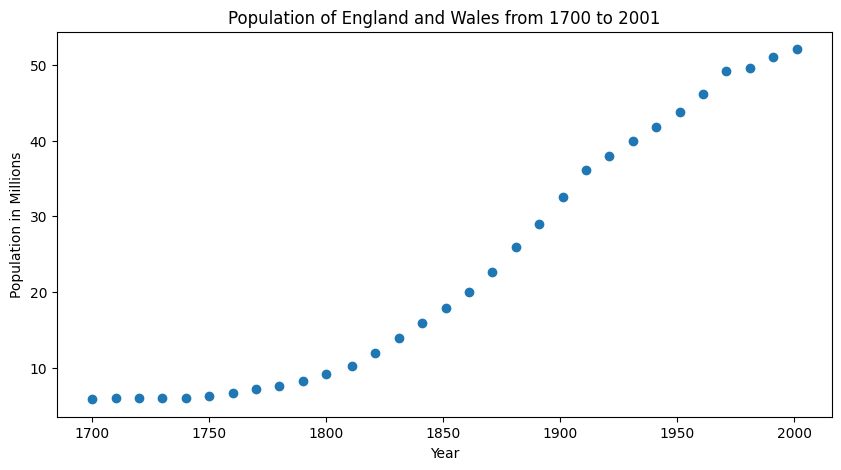

In [ ]:
plt.scatter(df_pop['year'], df_pop['population'])
plt.title("Population of England and Wales from 1700 to 2001")
plt.xlabel('Year')
plt.ylabel('Population in Millions')
plt.show()

  A = 65.308773
  k = 0.158869
 x0 = 20.503747
SSR = 66.966395


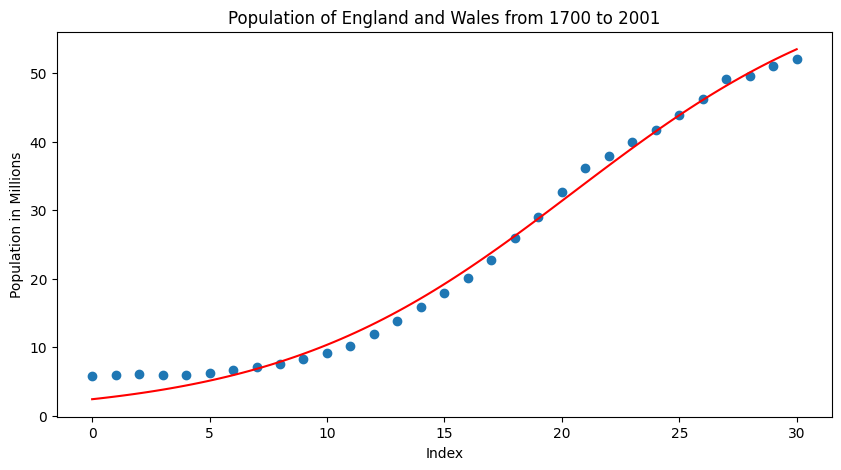

In [ ]:
def logistic(x, A, k, x0):
    return A/(1 + np.exp(-k * (x - x0)))

# When fitting, dont use the actual date/year as 'x'. Instead create an index variable x = 0, 1, 2, 3, ...
y = df_pop['population']
x = range(0, len(y))

popt, pcov = curve_fit(logistic, x, y, p0 = [50, 1, 1]) ## Initialize a closer A parameter to avoid warning, p0 = [50, 1, 1]

ssr = sum((y - logistic(x, *popt))**2)

print(f'  A = {popt[0]:.6f}')
print(f'  k = {popt[1]:.6f}')
print(f' x0 = {popt[2]:.6f}')
print(f'SSR = {ssr:.6f}')

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, logistic(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Population of England and Wales from 1700 to 2001")
plt.xlabel('Index')
plt.ylabel('Population in Millions')
plt.show()